# Data Generation

Generate synthetic data that simulates a real-world debt forgiveness problem

# Dependencies

In [1]:
import pickle
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from config import TREATMENT, OUTCOME, SEED
from modules.data_generation import (
    DataGeneration,
    add_synthetic_features
)
from utils.basics import plot_hist

warnings.filterwarnings("ignore")

# Env vars

In [2]:
n_samples = 15000
percentiles = np.arange(0, 1, 0.1)
np.random.seed(SEED)

# Utils

In [3]:
def get_high_correlations(df, features, threshold=0.7):
    # Calculate correlation matrix
    corr_matrix = df[features].corr()
    
    # Get upper triangle of correlation matrix (avoiding duplicates)
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find feature pairs with absolute correlation above threshold
    high_corr_pairs = []
    for col in upper_tri.columns:
        # Get correlations above threshold for this column
        high_corr = upper_tri[col][abs(upper_tri[col]) > threshold]
        
        # Add pairs to results
        for idx, corr_value in high_corr.items():
            high_corr_pairs.append({
                'feature1': col,
                'feature2': idx,
                'correlation': round(corr_value, 3)
            })
    
    return high_corr_pairs

# Generate data

## Random financial variables

In [4]:
generator = DataGeneration()
df = generator.generate_random_financial_data(n_samples)
df.describe(percentiles=percentiles)

,years_history,n_accounts,n_loans,years_since_default,loss_given_default,default_debt_amount,n_cards,n_refin,months_since_first_payment,debt_cirbe
count,15000.000000,15000.000000,15000.0000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,19.907577,0.323933,1.5148,4.051216,0.685847,38419.513710,2.251867,0.998333,39.549982,11220.757516
std,9.859788,0.627662,1.2371,2.858416,0.111362,49630.886464,1.656124,0.995187,39.665096,10678.628668
min,1.195721,0.000000,0.0000,0.010050,0.176264,475.716311,0.000000,0.000000,0.001733,401.887951
0%,1.195721,0.000000,0.0000,0.010050,0.176264,475.716311,0.000000,0.000000,0.001733,401.887951
10%,8.799728,0.000000,0.0000,1.070262,0.535024,6484.150079,0.000000,0.000000,4.072349,2848.010934
20%,11.587756,0.000000,0.0000,1.677750,0.592015,9803.075248,1.000000,0.000000,8.701510,4111.334647
30%,13.870264,0.000000,1.0000,2.238171,0.631165,13600.993076,1.000000,0.000000,14.146456,5317.490109
40%,16.100574,0.000000,1.0000,2.776503,0.663045,18242.492731,2.000000,1.000000,20.312803,6631.964701
50%,18.241130,0.000000,1.0000,3.382138,0.693721,23365.668896,2.000000,1.000000,27.472426,8142.283132


In [5]:
df.corr()

,years_history,n_accounts,n_loans,years_since_default,loss_given_default,default_debt_amount,n_cards,n_refin,months_since_first_payment,debt_cirbe
years_history,1.000000,0.130002,-0.011949,-0.000376,0.007048,0.000377,0.006898,0.011381,-0.001087,-0.009007
n_accounts,0.130002,1.000000,-0.004758,-0.008282,0.004290,-0.016031,-0.007300,0.004814,-0.014593,-0.000629
n_loans,-0.011949,-0.004758,1.000000,0.003355,0.000678,0.047603,-0.009304,0.013694,0.006599,0.010477
years_since_default,-0.000376,-0.008282,0.003355,1.000000,-0.010751,-0.015654,0.007868,-0.010417,0.012489,0.008794
loss_given_default,0.007048,0.004290,0.000678,-0.010751,1.000000,0.009712,-0.001439,-0.002777,0.010283,-0.009197
default_debt_amount,0.000377,-0.016031,0.047603,-0.015654,0.009712,1.000000,0.016642,-0.006802,0.012765,-0.005426
n_cards,0.006898,-0.007300,-0.009304,0.007868,-0.001439,0.016642,1.000000,0.001590,0.008257,0.001803
n_refin,0.011381,0.004814,0.013694,-0.010417,-0.002777,-0.006802,0.001590,1.000000,-0.007475,-0.003682
months_since_first_payment,-0.001087,-0.014593,0.006599,0.012489,0.010283,0.012765,0.008257,-0.007475,1.000000,-0.002640
debt_cirbe,-0.009007,-0.000629,0.010477,0.008794,-0.009197,-0.005426,0.001803,-0.003682,-0.002640,1.000000


## Treatment

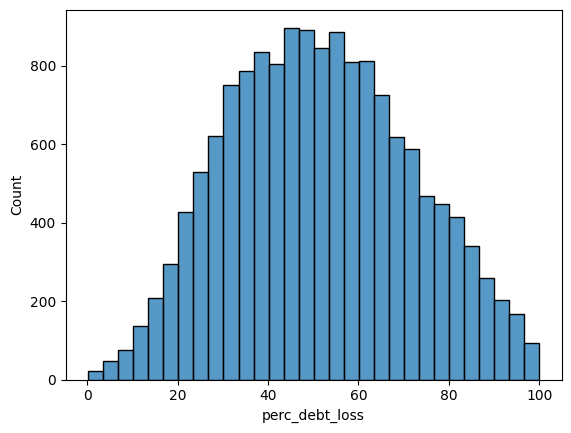

<Figure size 1000x800 with 0 Axes>

In [6]:
generator.fit_scalers(df)
df[TREATMENT] = generator.generate_treatment(df, noise=True, noise_scale=0.0, treament_noise_std=7)
plot_hist(df, TREATMENT)

## Outcome

In [7]:
df[OUTCOME + "_probs"], df[OUTCOME] = generator.calculate_outcome_probability(df, df[TREATMENT])

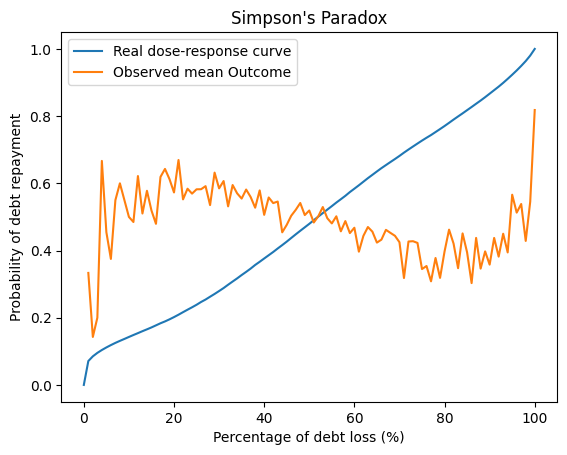

In [8]:
# Causal curves
step = 1
bin_edges = np.arange(0, 100+step, step)
real_dose_response = generator.compute_causal_effects(df, bin_edges, "ate")
bin_edges_contained = bin_edges.copy()
bin_edges_contained[0] = -1
df['treatment_bin'] = pd.cut(df[TREATMENT], bins=bin_edges_contained, labels=False)

mean_outcome = [c[0] for c in df.groupby(['treatment_bin'])[[OUTCOME]].mean().to_numpy().tolist()]
plt.plot(bin_edges, real_dose_response, label="Real dose-response curve")
plt.plot(bin_edges[1:], mean_outcome, label="Observed mean Outcome")
plt.legend(loc="upper left")
plt.xlabel("Percentage of debt loss (%)")
plt.ylabel("Probability of debt repayment")
plt.title("Simpson's Paradox")
plt.show()


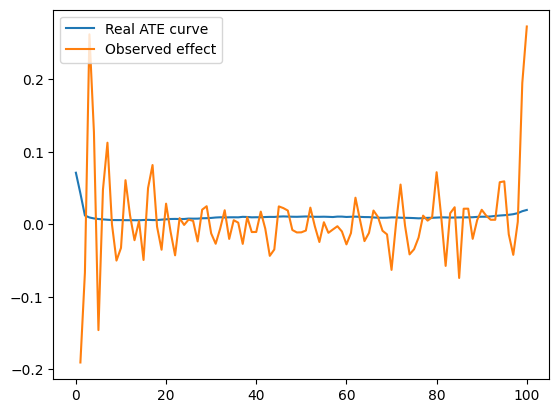

In [9]:
real_ate_curve = np.gradient(real_dose_response, bin_edges)
mean_observed_effect = np.gradient(mean_outcome, bin_edges[1:])
plt.plot(bin_edges, real_ate_curve, label="Real ATE curve")
plt.plot(bin_edges[1:], mean_observed_effect, label="Observed effect")
plt.legend(loc="upper left")
plt.show()

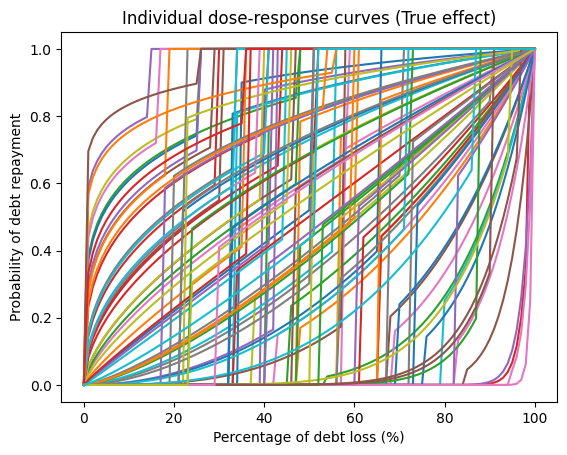

In [10]:
# Individual Causal curves
individial_dose_responses = generator.compute_causal_effects(df, bin_edges, "ite")
for i, line in enumerate(individial_dose_responses):
    if i // 100 == 0:
        ax = plt.plot(bin_edges, line, label=f'Line {i+1}')


plt.xlabel("Percentage of debt loss (%)")
plt.ylabel("Probability of debt repayment")
plt.title("Individual dose-response curves (True effect)")
plt.show()

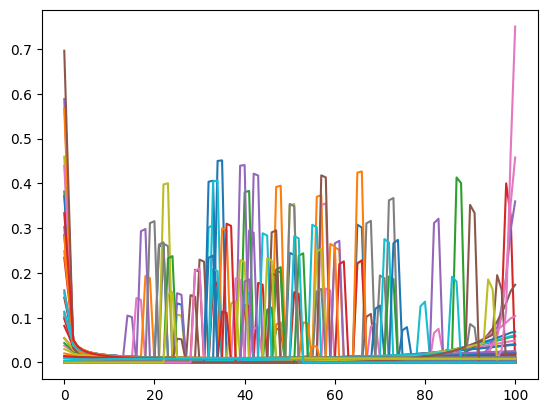

In [11]:
for i, line in enumerate(individial_dose_responses):
    if i // 100 == 0:
        real_ite_curve = np.gradient(line, bin_edges)
        ax = plt.plot(bin_edges, real_ite_curve, label=f'Line {i+1}')


plt.show()

## Redundant and Noisy features

In [12]:
df.drop(columns=['treatment_bin', 'debt_repayment_flag_probs'], inplace=True)
df = add_synthetic_features(df, n_redundant=100, n_noise=300, random_state=SEED)
df.describe()

,years_history,n_accounts,n_loans,years_since_default,loss_given_default,default_debt_amount,n_cards,n_refin,months_since_first_payment,debt_cirbe,...,noise*feature*291,noise*feature*292,noise*feature*293,noise*feature*294,noise*feature*295,noise*feature*296,noise*feature*297,noise*feature*298,noise*feature*299,noise*feature*300
count,15000.000000,15000.000000,15000.0000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,19.907577,0.323933,1.5148,4.051216,0.685847,38419.513710,2.251867,0.998333,39.549982,11220.757516,...,1.743198e-16,-2.955858e-16,-3.202179e-16,-9.459692e-16,3.183231e-16,-7.351749e-16,-3.145336e-16,-1.566984e-15,-1.153921e-15,1.184238e-16
std,9.859788,0.627662,1.2371,2.858416,0.111362,49630.886464,1.656124,0.995187,39.665096,10678.628668,...,3.000100e+00,4.000133e+00,4.000133e+00,2.000067e+00,4.000133e+00,4.000133e+00,3.000100e+00,3.000100e+00,3.000100e+00,3.000100e+00
min,1.195721,0.000000,0.0000,0.010050,0.176264,475.716311,0.000000,0.000000,0.001733,401.887951,...,-1.679199e+01,-5.295301e+00,-3.792948e+01,-1.664733e+01,-1.226416e+01,-2.376876e+01,-2.199839e+01,-2.368443e+00,-1.988300e+00,-3.828986e+00
25%,12.760460,0.000000,1.0000,1.944450,0.612473,11680.469928,1.000000,0.000000,11.328820,4705.811231,...,-1.709408e+00,-2.953633e+00,-1.861468e+00,-1.017446e+00,-2.826949e+00,-2.265408e+00,-1.522963e+00,-1.810464e+00,-1.562576e+00,-2.395739e+00
50%,18.241130,0.000000,1.0000,3.382138,0.693721,23365.668896,2.000000,1.000000,27.472426,8142.283132,...,4.408532e-01,-9.499613e-01,7.910181e-01,3.482565e-01,2.918805e-01,6.299795e-01,6.926905e-01,-9.695972e-01,-9.028707e-01,-7.345531e-01
75%,25.338822,1.000000,2.0000,5.495097,0.767766,45942.738239,3.000000,2.000000,55.176040,13926.016542,...,2.197064e+00,1.939162e+00,2.786857e+00,1.415237e+00,3.069425e+00,2.895161e+00,2.209543e+00,6.568587e-01,4.088126e-01,1.731510e+00
max,84.132779,6.000000,8.0000,21.997857,0.962007,887236.747416,12.000000,9.000000,355.303848,218290.223781,...,6.152303e+00,3.428642e+01,6.975789e+00,4.016754e+00,8.084405e+00,7.766801e+00,4.202991e+00,5.282023e+01,7.860472e+01,1.234565e+01


In [13]:
redundant_features = [c for c in df.columns if "redundant" in c]
original_features = list(df.iloc[:, :10].columns)
correlated_pairs = get_high_correlations(df, original_features+redundant_features, threshold=0.7)
print(correlated_pairs)
print(len(correlated_pairs))

[{'feature1': 'redundantfeature7_months_since_first_payment', 'feature2': 'months_since_first_payment', 'correlation': 0.795}, {'feature1': 'redundantfeature16_debt_cirbe', 'feature2': 'debt_cirbe', 'correlation': 0.835}, {'feature1': 'redundantfeature20_n_accounts', 'feature2': 'n_accounts', 'correlation': 0.769}, {'feature1': 'redundantfeature24_loss_given_default', 'feature2': 'loss_given_default', 'correlation': 0.856}, {'feature1': 'redundantfeature30_months_since_first_payment', 'feature2': 'months_since_first_payment', 'correlation': -0.843}, {'feature1': 'redundantfeature31_default_debt_amount', 'feature2': 'default_debt_amount', 'correlation': 0.825}, {'feature1': 'redundantfeature33_n_refin', 'feature2': 'n_refin', 'correlation': 0.789}, {'feature1': 'redundantfeature37_n_accounts', 'feature2': 'n_accounts', 'correlation': -0.827}, {'feature1': 'redundantfeature39_n_refin', 'feature2': 'n_refin', 'correlation': -0.724}, {'feature1': 'redundantfeature42_years_history', 'featur

In [14]:
null_counts = df.isnull().sum()
    
    # Filter to only columns that have nulls and sort by number of nulls
features_with_nulls = null_counts[null_counts > 0].sort_values(ascending=False)
features_with_nulls

Series([], dtype: int64)

# Save data

In [15]:
df.to_parquet("data/synthetic_data.parquet")

In [16]:
with open('data/data_generator.pkl', 'wb') as file:
    pickle.dump(generator, file)
